In [1]:
import sys
sys.path.append('..')

from wildlife_datasets import utils
from wildlife_datasets import datasets

root_dataset = '/mnt/data/turtles/datasets/datasets'
root_dataframe = '/mnt/data/turtles/datasets/dataframes'

dataset_names = [dataset_name for dataset_name in datasets.dataset_names]
dataset_names = [dataset_name for dataset_name in datasets.dataset_names if 'Segmented' not in dataset_name.__name__]

datasets = utils.loader.load_datasets(dataset_names, root_dataset, root_dataframe)

In [2]:
import numpy as np
import pandas as pd

def number_individuals(df):
    identities = df['identity'].unique()
    if 'unknown' in list(identities):
        return len(identities)-1
    else:
        return len(identities)

def number_small(df, ratio=0.1):
    df_red = df[df['identity'] != 'unknown']
    counts = df_red['identity'].value_counts().to_numpy()
    return np.sum(counts <= ratio*np.max(counts))

def average_photo_number(df):
    df_red = df[df['identity'] != 'unknown']
    counts = df_red['identity'].value_counts().to_numpy()
    return '$' + str(np.round(np.mean(counts), 1)) + '\pm' + str(np.round(np.std(counts), 1)) + '$'

def create_dict(i):
    return {
        'year': i.metadata['year'],
        'images': len(i.df[i.df['identity'] != 'unknown']),
        'individuals': number_individuals(i.df),
        # 'individuals small': number_small(i.df),
        'span': i.metadata['span'],
        'wild': i.metadata['wild'],
        'pattern': i.metadata['unique_pattern'],
        'not cropped': ~i.metadata['cropped'],
    }

names = [dataset.__class__.__name__ for dataset in datasets]
df = pd.DataFrame([create_dict(dataset) for dataset in datasets], index=names)
df

,year,images,individuals,span,wild,pattern,not cropped
AAUZebraFishID,2020,6672,6,1 day,False,False,True
AerialCattle2017,2017,46340,23,1 day,False,True,False
ATRW,2019,5415,182,short,False,True,True
BelugaID,2022,5902,788,2.1 years,True,False,False
BirdIndividualID,2019,51934,50,15 days,False,False,True
CTai,2016,4662,71,unknown,True,False,False
CZoo,2016,2109,24,unknown,False,False,False
Cows2021,2021,8670,181,1 month,False,True,False
Drosophila,2018,2591700,60,3 days,False,True,False
FriesianCattle2015,2016,377,40,1 day,False,True,False


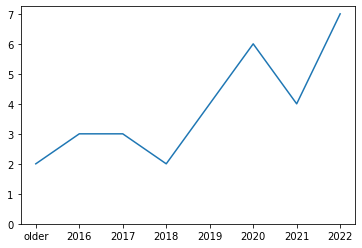

In [3]:
import numpy as np
import matplotlib.pyplot as plt

year_min = 2016
year_max = 2022

years = np.array([dataset.metadata['year'] for dataset in datasets])
counts = [sum(years < year_min)]
for year in range(year_min, year_max+1):
    counts.append(sum(year == years))
y_max = np.max(counts)
    
xlabel = np.concatenate((['older'], np.array(range(year_min, year_max+1))))
plt.plot(counts)
plt.xticks(ticks=range(len(xlabel)), labels=xlabel);
plt.yticks(ticks=range(0,y_max+1), labels=range(0,y_max+1));
#plt.savefig('counts.jpg', bbox_inches = 'tight')

In [4]:
def convert_latex(df, datasets):
    cites = [' \cite{' + dataset.metadata['cite'] + '}' for dataset in datasets]
    df = df.copy()
    df.insert(loc=0, column = 'name', value=df.index+cites)
    df.replace(True, r'\cmark', inplace=True)
    df.replace(False, r'\xmark', inplace=True)
    return df.to_latex(index=False, escape = False, float_format="%.0f")

print(convert_latex(df, datasets))

\begin{tabular}{lrrrllll}
\toprule
                                            name &  year &   images &  individuals &        span &    wild & pattern & not cropped \\
\midrule
            AAUZebraFishID \cite{bruslund2020re} &  2020 &     6672 &            6 &       1 day &  \xmark &  \xmark &      \cmark \\
        AerialCattle2017 \cite{andrew2017visual} &  2017 &    46340 &           23 &       1 day &  \xmark &  \cmark &      \xmark \\
                          ATRW \cite{li2019atrw} &  2019 &     5415 &          182 &       short &  \xmark &  \cmark &      \cmark \\
                        BelugaID \cite{belugaid} &  2022 &     5902 &          788 &   2.1 years &  \cmark &  \xmark &      \xmark \\
        BirdIndividualID \cite{ferreira2020deep} &  2019 &    51934 &           50 &     15 days &  \xmark &  \xmark &      \cmark \\
               CTai \cite{freytag2016chimpanzee} &  2016 &     4662 &           71 &     unknown &  \cmark &  \xmark &      \xmark \\
               CZo